In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from math import floor
from scipy.optimize import curve_fit as cf
import scipy.stats as stats

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

round_error = lambda value,rounder : np.round(value,dcmls(rounder))

def chi2(y,y_err,x,func,popt):
    y_ajuste = func(x,*popt)
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    return chi_cuadrado

def chi2_red(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def pvalue(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    pvalor = stats.chi2.sf(chi_cuadrado,grados_lib)
    return pvalor

In [4]:
files = os.listdir('clase1/tanda full 1')
names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(int(files[i][:-4]))
names = np.sort(np.array(names))

In [5]:
from scipy.signal import find_peaks as fp

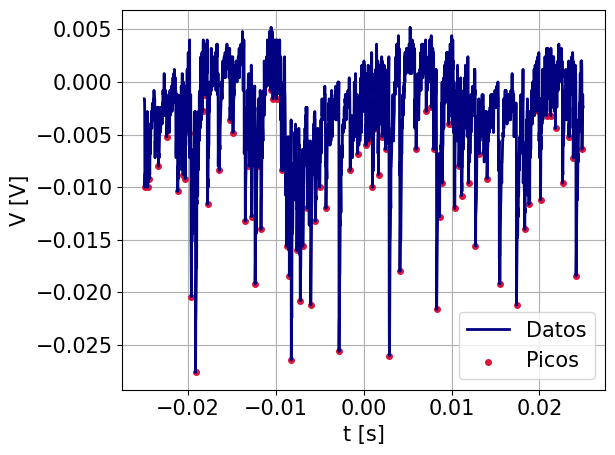

In [15]:
df = pd.read_csv('clase1/tanda full 1/400.csv')

pk_idxs = fp(-df.V1,distance=10,prominence=0.005)[0]

#plt.scatter(df.t,df.V1,c='navy',label='Datos')
plt.plot(df.t,df.V1,'navy',label='Datos')
plt.scatter(df.t[pk_idxs],df.V1[pk_idxs],c='crimson',label='Picos')
plt.xlabel('t [s]')
plt.ylabel('V [V]')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.xlim(-0.02,-0.01)

In [16]:
values = []
for name in names:
    df = pd.read_csv(f'clase1/tanda full 1/{name}.csv')
    values.extend(df.V1)
values = np.array(values)

In [17]:
ruido = []
for i in range(300):
    df = pd.read_csv(f'clase2/ruido detector 300/{i}.csv')
    ruido.extend(df.V1)
ruido = np.array(ruido)

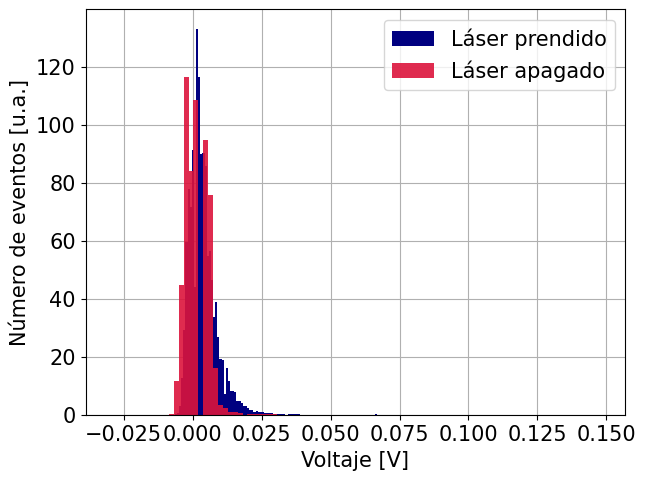

In [18]:
n1,bins1,patches1 = plt.hist(-values,bins=100,density=True,histtype='stepfilled',color='navy',label='Láser prendido')
n2,bins2,patches2 = plt.hist(-ruido,bins=100,density=True,histtype='stepfilled',color='crimson',label='Láser apagado')
for patch in patches2:
    patch.set_alpha(0.9)

plt.grid()
plt.tight_layout()
plt.xlabel('Voltaje [V]')
plt.ylabel('Número de eventos [u.a.]')
plt.legend()
#plt.ylim(0,130)
plt.show()

In [24]:
values_pk = []
for name in names:
    df = pd.read_csv(f'clase1/tanda full 1/{name}.csv')
    pk_idxs = fp(-df.V1,distance=10,prominence=0.005)[0]
    values_pk.extend(df.V1)
values_pk = np.array(values_pk)

In [25]:
ruido_pk = []
for i in range(20):
    df = pd.read_csv(f'clase1/ruido detector/{i}.csv')
    pk_idxs = fp(-df.V1,distance=10,prominence=0.005)[0]
    ruido_pk.extend(df.V1[pk_idxs])
ruido_pk = np.array(ruido_pk)

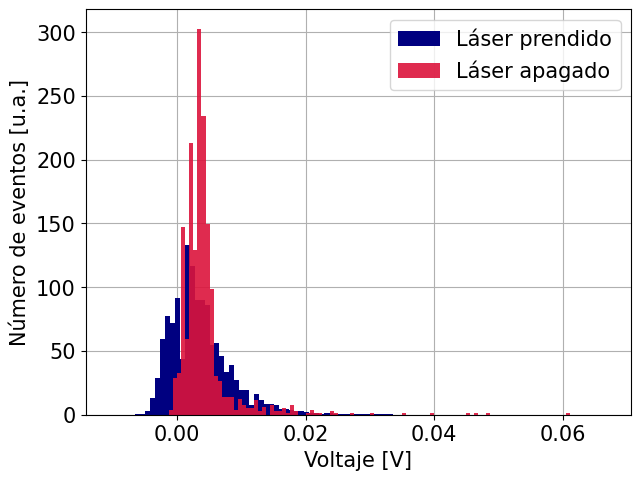

In [28]:
n1,bins1,patches1 = plt.hist(-values_pk,bins=100,density=True,histtype='stepfilled',color='navy',label='Láser prendido')
n2,bins2,patches2 = plt.hist(-ruido_pk,bins=100,density=True,histtype='stepfilled',color='crimson',label='Láser apagado')
for patch in patches2:
    patch.set_alpha(0.9)

plt.grid()
plt.tight_layout()
plt.xlabel('Voltaje [V]')
plt.ylabel('Número de eventos [u.a.]')
plt.legend()
#plt.ylim(0,130)
plt.show()

In [30]:
min(-ruido_pk)

-0.0012